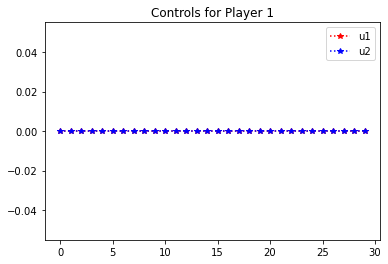

<Figure size 432x288 with 0 Axes>

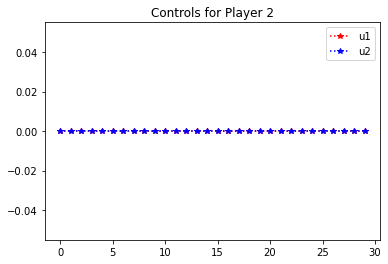

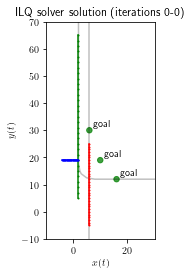

plot is shown above
START in P1 is here
hold_new_obs[ii, j] is:  -1.0
k in checkfuncP1 is:  29
hold_new_obs in checkfuncP1 is:  [[-17.39607805]
 [ -1.        ]
 [ -4.21110255]]
index in checkfuncP1 is:  (1, 0)
Player 1 LaneBoundaryP1 came out
l_{k+1} came out. calc_deriv_cost should be true
R is:  [array([[0.1, 0. ],
       [0. , 0.1]]), array([[0.1, 0. ],
       [0. , 0.1]]), array([[0.1, 0. ],
       [0. , 0.1]])]
Q for P1 is:  [[0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0

/Users/duyn/Desktop/Princeton/RESEARCH/Reach-Avoid-Games/ilq_solver_three_player_time_consistent.py:1361: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/runner/miniforge3/conda-bld/pytorch-recipe_1635217280611/work/torch/csrc/utils/tensor_new.cpp:201.)
  [torch.as_tensor(ui) for ui in us],
/Users/duyn/miniforge3/envs/reach-avoid-games/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

In [1]:
"""
BSD 3-Clause License

Copyright (c) 2019, HJ Reachability Group
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

Author(s): David Fridovich-Keil ( dfk@eecs.berkeley.edu )
"""
################################################################################
#
# Script to run a 3 player collision avoidance example intended to model
# a T-intersection.
#
################################################################################

import os
import numpy as np
import matplotlib.pyplot as plt

from unicycle_4d import Unicycle4D
#from bicycle_4d import Bicycle4D
from car_5d import Car5D
from car_10d import Car10D
from product_multiplayer_dynamical_system import \
    ProductMultiPlayerDynamicalSystem
from point_mass_2d import PointMass2D

from point import Point
from polyline import Polyline

#from ilq_solver import ILQSolver
#from ilq_solver_reach_avoid_twoplayer_playaround import ILQSolver

#from ilq_solver_horizontal_twoplayer_timeconsistent import ILQSolver
from ilq_solver_three_player_time_consistent import ILQSolver
#from ilq_solver_time_consistent import ILQSolver
from proximity_cost_reach_avoid_twoplayer import ProximityCost
#from product_state_proximity_cost import ProductStateProximityCost
from distance_twoplayer_cost import ProductStateProximityCost
from distance_twoplayer_cost_adversarial import ProductStateProximityCostAdversarial
from semiquadratic_cost import SemiquadraticCost
from quadratic_cost import QuadraticCost
#from semiquadratic_polyline_cost import SemiquadraticPolylineCost
from semiquadratic_polyline_cost_draw import SemiquadraticPolylineCostDraw
from quadratic_polyline_cost import QuadraticPolylineCost
#from player_cost import PlayerCost
#from player_cost_reach_avoid_twoplayer import PlayerCost
from player_cost_threeplayer_reachavoid_timeconsistent import PlayerCost
from box_constraint import BoxConstraint
from nominal_velocity_deviation_cost import NominalVelocityDeviationCost

from visualizer import Visualizer
from logger import Logger

# General parameters.
TIME_HORIZON = 3.0    # s #Change back to 2.0
TIME_RESOLUTION = 0.1 # s
HORIZON_STEPS = int(TIME_HORIZON / TIME_RESOLUTION)
LOG_DIRECTORY = "./logs/three_player/"

# Create dynamics.
car1 = Car5D(4.0)
car2 = Car5D(4.0)
ped = Unicycle4D()
dynamics = ProductMultiPlayerDynamicalSystem(
    [car1, car2, ped], T=TIME_RESOLUTION)

car3 = Car10D(4.0)
dynamics_10D = ProductMultiPlayerDynamicalSystem(
    [car3], T=TIME_RESOLUTION)

# Choose initial states and set initial control laws to zero, such that
# we start with a situation that looks like this:
#
#              (car 2)
#             |   X   .       |
#             |   :   .       |
#             |  \./  .       |
# (unicycle) X-->     .       |
#             |       .        ------------------
#             |       .
#             |       .        ..................
#             |       .
#             |       .        ------------------
#             |       .   ^   |
#             |       .   :   |         (+y)
#             |       .   :   |          |
#             |       .   X   |          |
#                      (car 1)           |______ (+x)
#
# We shall set up the costs so that car 2 wants to turn and car 1 / unicycle 1
# continue straight in their initial direction of motion.
# We shall assume that lanes are 4 m wide and set the origin to be in the
# bottom left along the road boundary.
car1_theta0 = np.pi / 2.0 # 90 degree heading
car1_v0 = 10.0             # 5 m/s initial speed
car1_x0 = np.array([
    [6.0],
    [-5.0],
    [car1_theta0],
    [0.0],
    [car1_v0]
])

car2_theta0 = -np.pi / 2.0 # -90 degree heading
car2_v0 = 20.0              # 2 m/s initial speed
car2_x0 = np.array([
    [2.0],
    [65.0],
    [car2_theta0],
    [0.0],
    [car2_v0]
])

ped_theta0 = 0.0 # 90 degree heading
ped_v0 = 2.0             # 5 m/s initial speed
ped_x0 = np.array([
    [-4.0],
    [19.0],
    [ped_theta0],
    [ped_v0]
])


#ped_vx0 = 0.25 # moving right at 0.25 m/s
#ped_vy0 = 0.0   # moving normal to traffic flow
#ped_x0 = np.array([
#    [-4.0],
#    [19.0],
#    [ped_vx0],
#    [ped_vy0]
#])


stacked_x0 = np.concatenate([car1_x0, car2_x0, ped_x0], axis=0)

car1_Ps = [np.zeros((car1._u_dim, dynamics._x_dim))] * HORIZON_STEPS
car2_Ps = [np.zeros((car2._u_dim, dynamics._x_dim))] * HORIZON_STEPS
ped_Ps = [np.zeros((ped._u_dim, dynamics._x_dim))] * HORIZON_STEPS

car1_alphas = [np.zeros((car1._u_dim, 1))] * HORIZON_STEPS
car2_alphas = [np.zeros((car2._u_dim, 1))] * HORIZON_STEPS
ped_alphas = [np.zeros((ped._u_dim, 1))] * HORIZON_STEPS


# Create environment:
car1_position_indices_in_product_state = (0, 1)
car1_polyline = Polyline([Point(8.5, -100.0), Point(8.5, 100.0)])
#car1_polyline_boundary_cost = SemiquadraticPolylineCost(
#    car1_polyline, 1.0, car1_position_indices_in_product_state,
#    "car1_polyline_boundary")
car1_polyline_cost = QuadraticPolylineCost(
    car1_polyline, car1_position_indices_in_product_state, "car1_polyline")

car1_goal = Point(6.0, 30.0) # Change back to Point(8.5, 15.0)
car1_goal_radius = 1
car1_goal_cost = ProximityCost(
    car1_position_indices_in_product_state, car1_goal, np.inf, "car1_goal")

car1_dist_sep = 2

# Environment for Car 2
car2_position_indices_in_product_state = (5, 6)
car2_polyline = Polyline([Point(4.5, 15.0),
                          Point(4.5, -5.0)])
#car2_polyline_boundary_cost = SemiquadraticPolylineCost(
#    car2_polyline, 1.0, car2_position_indices_in_product_state,
#    "car2_polyline_boundary")
car2_polyline_cost = QuadraticPolylineCost(
    car2_polyline, car2_position_indices_in_product_state, "car2_polyline")

car2_goal = Point(16.0, 12.0)
car2_goal_radius = 1
car2_goal_cost = ProximityCost(
    car2_position_indices_in_product_state, car2_goal, np.inf, "car2_goal")

car2_dist_sep = 2

# Environment for Pedestrian
ped_position_indices_in_product_state = (10, 11)
ped_goal = Point(10.0, 19.0)
ped_goal_cost = ProximityCost(
    ped_position_indices_in_product_state, ped_goal, np.inf, "ped_goal")



car1_polyline = Polyline([Point(6.0, -100.0), Point(6.0, 100.0)])
car1_polyline_boundary_cost = SemiquadraticPolylineCostDraw(
    car1_polyline, 1.0, car1_position_indices_in_product_state, 1,
    "car1_polyline_boundary")

car2_polyline = Polyline([Point(2.0, 100.0),
                          Point(2.0, 18.0),
                          Point(2.5, 15.0),
                          Point(3.0, 14.0),
                          Point(5.0, 12.5),
                          Point(8.0, 12.0),
                          Point(100.0, 12.0)])
car2_polyline_boundary_cost = SemiquadraticPolylineCostDraw(
    car2_polyline, 1.0, car2_position_indices_in_product_state, 2,
    "car2_polyline_boundary")


#car3_polyline = Polyline([Point(-20.0, -4.0), Point(15.0, -4.0)])
#car3_polyline_boundary_cost = SemiquadraticPolylineCostDraw(
#    car3_polyline, 1.0, car2_position_indices_in_product_state, 3,
#    "car2_polyline_boundary")




# Penalize speed above a threshold for all players.
car1_v_index_in_product_state = 4
car1_maxv = 8.0 # m/s
car1_minv_cost = SemiquadraticCost(
    car1_v_index_in_product_state, 0.0, False, "car1_minv")
car1_maxv_cost = SemiquadraticCost(
    car1_v_index_in_product_state, car1_maxv, True, "car1_maxv")

car2_v_index_in_product_state = 9
car2_maxv = 8.0 # m/s
car2_minv_cost = SemiquadraticCost(
    car2_v_index_in_product_state, 0.0, False, "car2_minv")
car2_maxv_cost = SemiquadraticCost(
    car2_v_index_in_product_state, car2_maxv, True, "car2_maxv")


# Penalize deviation from nominal speed for all players
car1_nominalv = 0.0 # 8.0
car1_nom_vel_dev = NominalVelocityDeviationCost(car1_v_index_in_product_state, car1_nominalv, "car1_nom_v_dev")

car2_nominalv = 0.0 # 6.0
car2_nom_vel_dev = NominalVelocityDeviationCost(car2_v_index_in_product_state, car1_nominalv, "car2_nom_v_dev")


# Control costs for all players.
car1_steering_cost = QuadraticCost(0, 0.0, "car1_steering")
car1_a_cost = QuadraticCost(1, 0.0, "car1_a")

car2_steering_cost = QuadraticCost(0, 0.0, "car2_steering")
car2_a_cost = QuadraticCost(1, 0.0, "car2_a")


# Player ids
car1_player_id = 0
car2_player_id = 1

# Proximity cost.
CAR_PROXIMITY_THRESHOLD = 3.0
car1_proximity_cost = ProductStateProximityCost(
    [car1_position_indices_in_product_state,
     car2_position_indices_in_product_state],
    CAR_PROXIMITY_THRESHOLD,
    car1_player_id,
    "car1_proximity")
car2_proximity_cost = ProductStateProximityCostAdversarial(
    [car1_position_indices_in_product_state,
     car2_position_indices_in_product_state],
    CAR_PROXIMITY_THRESHOLD,
    car2_player_id,
    "car2_proximity")

# Build up total costs for both players. This is basically a zero-sum game.
car1_cost = PlayerCost()
car1_cost.add_cost(car1_goal_cost, "x", 1.0) #30.0 # -1.0
#car1_cost.add_cost(car1_polyline_cost, "x", 50.0) # 50.0
#car1_cost.add_cost(car1_polyline_boundary_cost, "x", 200.0) # 200.0
#car1_cost.add_cost(car1_maxv_cost, "x", 100.0) # 100.0
#car1_cost.add_cost(car1_minv_cost, "x", 100.0) # 100.0
#car1_cost.add_cost(car1_proximity_cost, "x", 300.0) # 100.0
#car1_cost.add_cost(car1_nom_vel_dev, "x", 50.0)

car1_player_id = 0
#car1_cost.add_cost(car1_steering_cost, car1_player_id, 50.0) # 50.0
#car1_cost.add_cost(car1_a_cost, car1_player_id, 1.0) # 1.0

car2_cost = PlayerCost()
car2_cost.add_cost(car2_goal_cost, "x", 1.0) #30.0 # -1.0
#car2_cost.add_cost(car2_polyline_cost, "x", 250.0) #50.0
#car2_cost.add_cost(car2_polyline_boundary_cost, "x", 100.0) # 200.0
#car2_cost.add_cost(car2_maxv_cost, "x", 80.0) # 100.0
#car2_cost.add_cost(car2_minv_cost, "x", 80.0) # 100.0
#car2_cost.add_cost(car2_proximity_cost, "x", 10.0) # 100.0
#car2_cost.add_cost(car2_nom_vel_dev, "x", 50.0)

car2_player_id = 1
#car2_cost.add_cost(car2_steering_cost, car2_player_id, 50.0) # 50.0
#car2_cost.add_cost(car2_a_cost, car2_player_id, 1.0) # 1.0


ped_cost = PlayerCost()
ped_cost.add_cost(ped_goal_cost, "x", 1.0)

#ped_cost.add_cost(ped_maxvx_cost, "x", 100.0)
#ped_cost.add_cost(ped_maxvy_cost, "x", 100.0)
#ped_cost.add_cost(proximity_cost, "x", 2.0)

ped_player_id = 2
#ped_cost.add_cost(ped_ax_cost, ped_player_id, 0.001)
#ped_cost.add_cost(ped_ay_cost, ped_player_id, 0.001)


# Visualizer.
#visualizer = Visualizer(
#    [car1_position_indices_in_product_state,
#     car2_position_indices_in_product_state],
#    [car1_polyline_boundary_cost,
#     car1_goal_cost,
#     car2_polyline_boundary_cost,
#     car2_goal_cost],
#    [".-r", ".-g", ".-b"],
#    1,
#    False,
#    plot_lims=[-5, 25, -5, 35])

visualizer = Visualizer(
    [car1_position_indices_in_product_state,
     car2_position_indices_in_product_state,
     ped_position_indices_in_product_state],
    [car1_polyline_boundary_cost,
     car1_goal_cost,
     car2_goal_cost,
     ped_goal_cost,
     car2_polyline_boundary_cost],
    [".-r", ".-g", ".-b"],
    1,
    False,
    plot_lims=[-10, 30, -10, 70])

# Logger.
if not os.path.exists(LOG_DIRECTORY):
    os.makedirs(LOG_DIRECTORY)

logger = Logger(os.path.join(LOG_DIRECTORY, 'intersection_car_example.pkl'))

# Set up ILQSolver.
solver = ILQSolver(dynamics,
                   dynamics_10D,
                   [car1_cost, car2_cost, ped_cost],
                   stacked_x0,
                   [car1_Ps, car2_Ps, ped_Ps],
                   [car1_alphas, car2_alphas, ped_alphas],
                   0.1,
                   None,
                   logger,
                   visualizer,
                   [ [car1_position_indices_in_product_state, car2_position_indices_in_product_state], 
                    [car1_goal, car2_goal], [car1_goal_radius, car2_goal_radius], [car1_dist_sep, car2_dist_sep] ],
                   None)

solver.run()